In [1]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

/Users/carlosneves/Documents/Projects/fiap/fiap_techchallenge04/.venv_autogluon/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/train.csv")
df.head()

,item_id,timestamp,target
0,H1,1750-01-01 00:00:00,605.0
1,H1,1750-01-01 01:00:00,586.0
2,H1,1750-01-01 02:00:00,586.0
3,H1,1750-01-01 03:00:00,559.0
4,H1,1750-01-01 04:00:00,511.0


In [3]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp"
)
train_data.head()

target
item_id timestamp                  
H1      1750-01-01 00:00:00   605.0
        1750-01-01 01:00:00   586.0
        1750-01-01 02:00:00   586.0
        1750-01-01 03:00:00   559.0
        1750-01-01 04:00:00   511.0

In [4]:
predictor = TimeSeriesPredictor(
    prediction_length=48,
    path="autogluon-m4-hourly",
    target="target",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'autogluon-m4-hourly'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:14:59 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T8122
CPU Count:          8
GPU Count:          0
Memory Avail:       2.41 GB / 8.00 GB (30.1%)
Disk Space Avail:   66.20 GB / 228.27 GB (29.0%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'time_limit': 600,
 'verbosity': 2}

Inferred time series frequency:

In [5]:
predictions = predictor.predict(train_data)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean         0.1         0.2         0.3  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  628.106002  607.859875  614.809955  619.821451   
        1750-01-30 05:00:00  557.797195  530.897586  540.131670  546.790093   
        1750-01-30 06:00:00  516.341212  484.333259  495.320932  503.243817   
        1750-01-30 07:00:00  486.463258  450.146814  462.613503  471.602863   
        1750-01-30 08:00:00  461.463112  421.349347  435.119579  445.048885   

                                    0.4         0.5         0.6         0.7  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  624.103590  628.106002  632.108415  636.390553   
        1750-01-30 05:00:00  552.479471  557.797195  563.114919  568.804297   
        1750-01-30 06:00:00  510.013630  516.341212  522.668793  529.438607   
        1750-01-30 07:00:00  479.283940  486.463258  493.642576  501.323653   
        1750-01-30 08:00:00  453.533110  461.463112  469.393114  477.877340   

                                    0.8         0.9  
item_id timestamp                                    
H1      1750-01-30 04:00:00  641.402050  648.352129  
        1750-01-30 05:00:00  575.462720  584.696803  
        1750-01-30 06:00:00  537.361492  548.349164  
        1750-01-30 07:00:00  510.313013  522.779703  
        1750-01-30 08:00:00  487.806646  501.576878

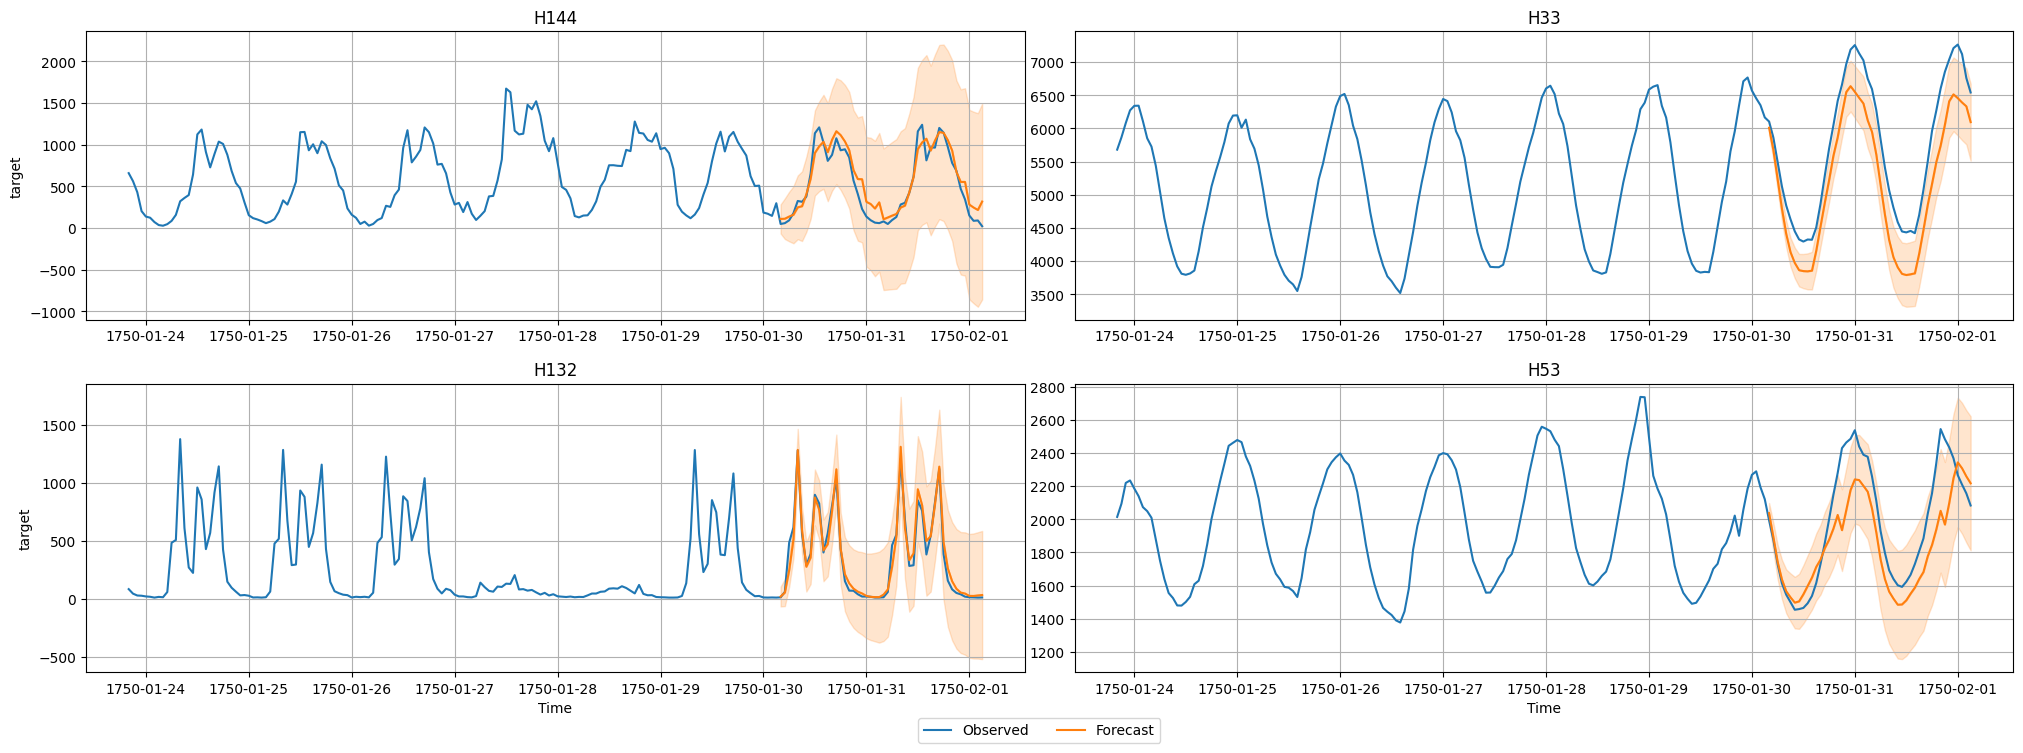

In [6]:
import matplotlib.pyplot as plt

# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/test.csv")

# Plot 4 randomly chosen time series and the respective forecasts
predictor.plot(test_data, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4);

In [7]:
# The test score is computed using the last
# prediction_length=48 timesteps of each time series in test_data
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-0.860954,-0.912286,25.876992,31.331369,0.623824,8
1,RecursiveTabular,-0.862797,-0.933874,0.704930,0.897662,6.795243,3
2,SeasonalNaive,-1.022854,-1.216909,0.107051,0.072581,0.072934,2
3,DirectTabular,-1.605700,-1.292127,0.236713,0.227934,4.558011,4
4,ETS,-1.805637,-1.968375,24.823475,30.133192,0.077429,5
5,Theta,-1.905365,-2.142531,10.815714,5.796920,0.074912,6
6,TemporalFusionTransformer,-2.234697,-2.512656,0.257773,0.174794,149.622998,7
7,Naive,-6.696079,-6.662942,0.075405,1.111147,0.069711,1
